In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [3]:
df_subset = df[['area', 'price', 'rooms']]
df_subset.head()

,area,price,rooms
0,108,510000,3
1,47,215000,2
2,116,325000,3
3,58,315000,3
4,63,200000,3


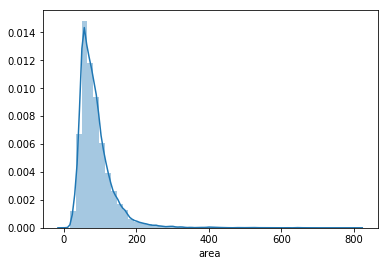

In [4]:
sns.distplot(df['area'])
plt.show()

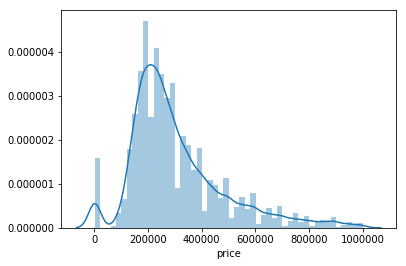

In [5]:
sns.distplot(df['price'])
plt.show()

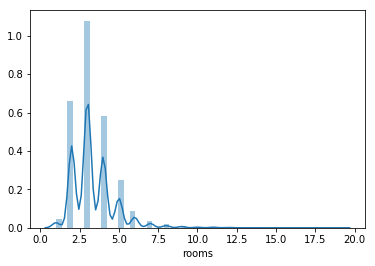

In [6]:
sns.distplot(df['rooms'])
plt.show()

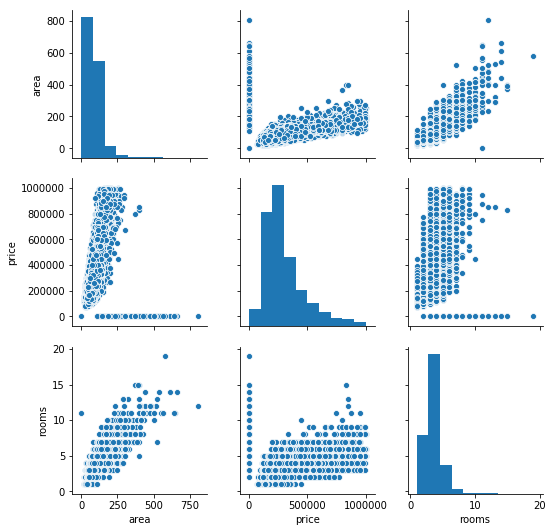

In [7]:
funda_matrix = sns.pairplot(df_subset)

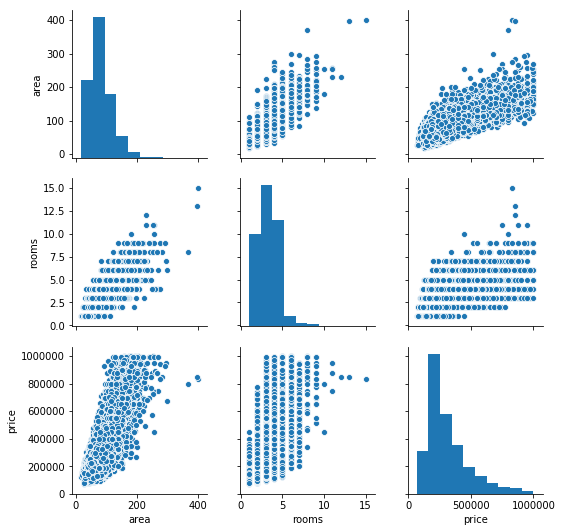

In [8]:
df = df[(df['price'] > 20000) & (df['area'] > 5) & (df['rooms'] > 0)]
df_sel = df[['area', 'rooms', 'price']]
sns.pairplot(df_sel)
plt.show()

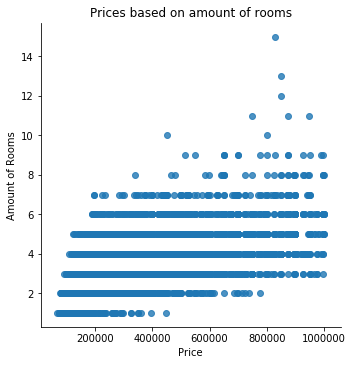

In [9]:
sns.lmplot(x='price', y='rooms', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Price') #use matplotlib to refine Seaborn plot
plt.ylabel('Amount of Rooms')
plt.title('Prices based on amount of rooms')
plt.show()

In [10]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
pearsonr(df['price'],df['rooms'])

(0.540555973731477, 0.0)

In [11]:
df_subset = df[['price', 'area']]
df_subset.head()

,price,area
0,510000,108
1,215000,47
2,325000,116
3,315000,58
4,200000,63


In [12]:
df = df[(df['price'] > 200000) & (df['area'] > 100 )]
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
16,16,Minervalaan 69 II,130,3,1077 NR,5-7-2016,665000,apartment,4,10-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1929


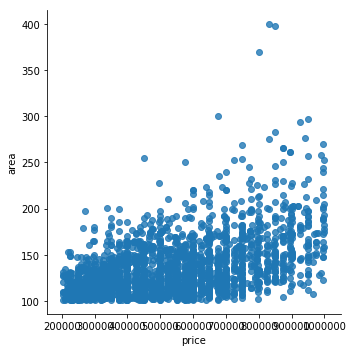

In [13]:
sns.lmplot(x="price", fit_reg=False, y="area", data=df);

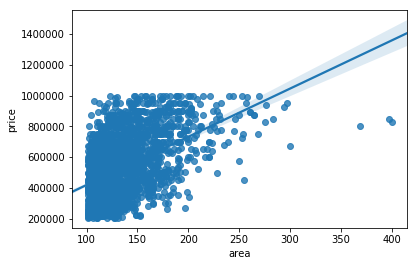

In [14]:
sns.regplot(x="area", fit_reg=True, y="price", data=df);

In [15]:
x = df_sel[['area']] #to use sk-learn, we need to create lists of the two variables
y = df_sel['price']

lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.intercept_ #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals. 

The regression line is equal to y = 3498.81 + 27983.93X


In [17]:
df_sel['price_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(50)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
16,16,Minervalaan 69 II,130,3,1077 NR,5-7-2016,665000,apartment,4,10-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1929
21,21,Slichtenhorststraat 10,114,3,1107 VH,18-9-2015,234500,house,4,3-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1983
22,22,Isabella Richaardsstraat 46,112,3,1103 MA,17-4-2016,219000,house,4,3-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1998
24,24,Cornelis van Alkemadestraat 21,147,6,1065 AA,14-5-2016,295000,house,7,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1956
25,25,Van Suchtelen van de Haarestraat 28 K,107,3,1068 GV,26-2-2016,260000,apartment,4,1-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2000
27,27,Rustenburgerstraat 298 hs,127,3,1073 GM,25-5-2016,825000,apartment,4,4-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
